In [1]:
import math
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import dvfdata

dep_selection="All"
model_name="LigthGBM"
#dep_selection="77"


In [2]:
df=dvfdata.loadDVF_Maisons(departement=dep_selection,refresh_force=False
                           ,add_commune=False,filterColsInsee="Permutation")

Read Mutations
Read Local
Read Parcelle
Read Adresse
Make the join for DVF
Filter data:
Final Calculations


In [3]:
df_prepared=dvfdata.prepare_df(df,remove_categories=False)
# Keep only random part of all records.
df_prepared=df_prepared.sample(n=100000, random_state=42)

Prepare : filter extrem values
Prepare : drop geo categories
Prepare : update categories


In [12]:
test_df=pd.to_datetime(df_prepared['datemut'])
df_prepared['year']=test_df.dt.year
df_prepared['month']=test_df.dt.month


In [13]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 856616 to 585282
Data columns (total 9 columns):
datemut       100000 non-null datetime64[ns]
valeurfonc    100000 non-null int64
sterr         100000 non-null int64
geolong       100000 non-null float64
geolat        100000 non-null float64
nbpprinc      100000 non-null float64
sbati         100000 non-null float64
year          100000 non-null int64
month         100000 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 7.6 MB


In [14]:
df_prepared.head(20)

,datemut,valeurfonc,sterr,geolong,geolat,nbpprinc,sbati,year,month
856616,2016-09-22,101000,463,1.689543,47.769593,3.0,65.0,2016,9
1152784,2014-06-30,150000,150,2.733744,50.741199,3.0,90.0,2014,6
1151480,2014-11-18,142900,113,3.182570,50.715574,4.0,72.0,2014,11
566739,2016-11-10,92000,530,-0.194309,45.014015,3.0,68.0,2016,11
1283055,2014-05-30,118000,1533,3.472672,45.958647,6.0,158.0,2014,5
196470,2017-03-03,155000,2049,2.525850,45.442177,6.0,133.0,2017,3
101780,2014-07-25,200000,1105,1.599457,42.872710,5.0,128.0,2014,7
262480,2016-06-25,125000,1109,2.649372,47.072748,5.0,123.0,2016,6
1403864,2016-06-28,401000,1326,6.357473,45.686778,5.0,125.0,2016,6
957556,2017-05-12,210000,265,3.986176,49.342174,5.0,90.0,2017,5


In [15]:
# Keep only prix et date mutation
# build Month
# Get moyenne(Prix) par Mois et Année : df.groupby(['year','month']).mean()

# Graphe circulaire : 
# Axe : mois
# courbes différentes : Années
# valeur : moyenne du prix.
df=df_prepared[['year','month','valeurfonc']]

In [23]:
#df.head(20)
df.describe()

,year,month,valeurfonc
count,100000.000000,100000.000000,100000.000000
mean,2016.061490,6.662350,193948.798610
std,1.354159,3.346959,134815.695972
min,2014.000000,1.000000,10.000000
25%,2015.000000,4.000000,105000.000000
50%,2016.000000,7.000000,165000.000000
75%,2017.000000,9.000000,245000.000000
max,2018.000000,12.000000,999800.000000


In [36]:
stats_year_month_mean=df.groupby(['year','month']).mean()
stats_year_month_mean.reset_index(inplace=True)
stats_year_month_mean.head(10)

,year,month,valeurfonc
0,2014,1,177811.303810
1,2014,2,184497.101506
2,2014,3,176921.984833
3,2014,4,172986.103592
4,2014,5,190308.649123
5,2014,6,188432.362407
6,2014,7,200752.292556
7,2014,8,196446.254510
8,2014,9,188373.045455
9,2014,10,183005.654248


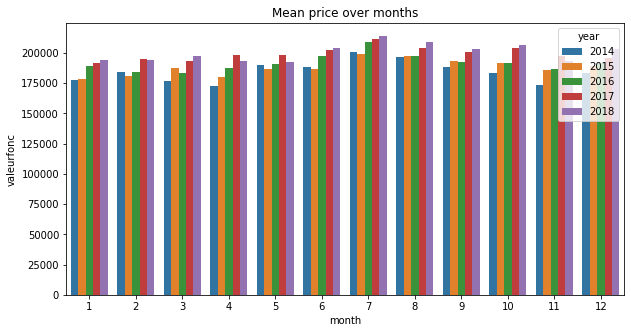

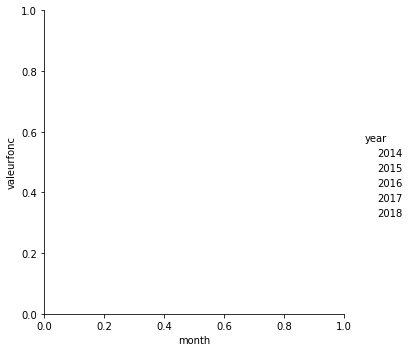

In [56]:
%matplotlib inline

fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Mean price over months")
sns.catplot(ax=axes,x="month", y="valeurfonc", hue="year", kind="bar"
            , data=stats_year_month_mean)
#plt.legend(title='Year:', loc='lower left')

#sns.catplot(x="valeurfonc", y="month", hue="year",kind="violin", data=stats_year_month_mean);

